## Single-Factor Model (Capital Asset Pricing Model)

In [1]:
import pandas_datareader.data as wb
import yfinance as yf
from yahoo_fin import stock_info
import datetime as dt
import numpy as np
import pandas as pd

In [2]:
# Getting components of S&P500
symbols = stock_info.tickers_sp500()
print(len(symbols))
# Yahoo Finance uses dot-separation instead of hyphen
symbols = [ticker.replace(".", "-") for ticker in symbols]    # Yahoo
pd.Series(symbols).to_csv('symbols.csv')

505


In [3]:
start_date = dt.datetime(2015, 1, 1)
end_date = start_date.replace(start_date.year + 5)
print(f'{start_date} to {end_date} is a 5 year duration')

2015-01-01 00:00:00 to 2020-01-01 00:00:00 is a 5 year duration


In [4]:
# Randomly selecting 35 stocks from the components 
# of S&P500
np.random.seed(3456)
symbols_array = np.array(symbols)
symbols_35 = np.random.choice(symbols_array, size = 35, replace = False)
symbols = list(symbols_35)
print(symbols)

['NOW', 'BXP', 'AMAT', 'ATVI', 'ADI', 'FE', 'INTU', 'TFC', 'MSCI', 'SPGI', 'STE', 'CNC', 'FRC', 'A', 'EQIX', 'TT', 'SWKS', 'FDS', 'SHW', 'BA', 'PNC', 'LUV', 'F', 'FLT', 'INTC', 'LKQ', 'WBA', 'KMX', 'CVS', 'PHM', 'MRK', 'PWR', 'CAT', 'CHRW', 'TSN']


In [5]:
# Downloading monthly prices of the 35 stocks
assets_data = yf.download(symbols, start_date, end_date, interval = '1mo')['Close']
print(assets_data.head())
assets_data.to_csv('stocks_data.csv')

[*********************100%***********************]  35 of 35 completed
                A        ADI   AMAT  ATVI          BA         BXP        CAT  \
Date                                                                           
2015-01-01  37.77  52.110001  22.84  20.9  145.369995  138.800003  79.970001   
2015-01-02    NaN        NaN    NaN   NaN         NaN         NaN        NaN   
2015-01-07    NaN        NaN    NaN   NaN         NaN         NaN        NaN   
2015-01-13    NaN        NaN    NaN   NaN         NaN         NaN        NaN   
2015-01-15    NaN        NaN    NaN   NaN         NaN         NaN        NaN   

                 CHRW        CNC        CVS  ...        PNC    PWR        SHW  \
Date                                         ...                                
2015-01-01  71.220001  27.290001  98.160004  ...  84.540001  26.48  90.423332   
2015-01-02        NaN        NaN        NaN  ...        NaN    NaN        NaN   
2015-01-07        NaN        NaN        NaN 

In [6]:
stocks_data = assets_data.dropna()

In [7]:
print(stocks_data.shape)
stocks_data.to_csv('stocks_data.csv')

(60, 35)


In [8]:
# Downloading monthly prices of the benchmark
sp500_data = yf.download('^GSPC', start_date, end_date, interval = '1mo')['Close']
sp500_data = sp500_data.dropna()
print(sp500_data.head())
sp500_data.to_csv('sp500_data.csv')

[*********************100%***********************]  1 of 1 completed
Date
2015-01-01    1994.989990
2015-02-01    2104.500000
2015-03-01    2067.889893
2015-04-01    2085.510010
2015-05-01    2107.389893
Name: Close, dtype: float64


In [9]:
# Calculating monthly log returns
# Stock returns
stocks_returns = stocks_data.pct_change().dropna()
# benchmark - mark returns
sp500_returns = sp500_data.pct_change().dropna()
sp500_returns.name = 'SP500'
print(stocks_returns.head(5))
print(sp500_returns.head(5))
stocks_returns.to_csv('stocks_returns.csv')
sp500_returns.to_csv('sp500_returns.csv')

                   A       ADI      AMAT      ATVI        BA       BXP  \
Date                                                                     
2015-02-01  0.117554  0.123393  0.096760  0.115789  0.037697 -0.010014   
2015-03-01 -0.015636  0.076187 -0.099401 -0.025300 -0.005104  0.022342   
2015-04-01 -0.004332 -0.018413 -0.122784  0.003960 -0.044909 -0.058158   
2015-05-01 -0.004351  0.098965  0.017180  0.106924 -0.019673 -0.017232   
2015-06-01 -0.063365 -0.055474 -0.045206 -0.041568 -0.012810 -0.069138   

                 CAT      CHRW       CNC       CVS  ...       PNC       PWR  \
Date                                                ...                       
2015-02-01  0.036639  0.043246  0.126053  0.058170  ...  0.087769  0.086858   
2015-03-01 -0.034620 -0.014536  0.150179 -0.006354  ...  0.013919 -0.008687   
2015-04-01  0.085593 -0.120595 -0.123073 -0.037981  ... -0.016195  0.013319   
2015-05-01 -0.017956 -0.041311  0.215357  0.031121  ...  0.043170  0.014182   
2015-06

In [20]:
model_data = pd.merge(sp500_returns, stocks_returns, on = 'Date')
print(model_data.head())
model_data.to_csv('single_index_model_data.csv')

               SP500         A       ADI      AMAT      ATVI        BA  \
Date                                                                     
2015-02-01  0.054893  0.117554  0.123393  0.096760  0.115789  0.037697   
2015-03-01 -0.017396 -0.015636  0.076187 -0.099401 -0.025300 -0.005104   
2015-04-01  0.008521 -0.004332 -0.018413 -0.122784  0.003960 -0.044909   
2015-05-01  0.010491 -0.004351  0.098965  0.017180  0.106924 -0.019673   
2015-06-01 -0.021012 -0.063365 -0.055474 -0.045206 -0.041568 -0.012810   

                 BXP       CAT      CHRW       CNC  ...       PNC       PWR  \
Date                                                ...                       
2015-02-01 -0.010014  0.036639  0.043246  0.126053  ...  0.087769  0.086858   
2015-03-01  0.022342 -0.034620 -0.014536  0.150179  ...  0.013919 -0.008687   
2015-04-01 -0.058158  0.085593 -0.120595 -0.123073  ... -0.016195  0.013319   
2015-05-01 -0.017232 -0.017956 -0.041311  0.215357  ...  0.043170  0.014182   
2015-06

In [10]:
import statsmodels.api as sm
# Single index model Regression
x = sp500_returns.values
x_sm = sm.add_constant(x)
result = {}
for (colname, colvalue) in stocks_returns.iteritems():
    y = stocks_returns[colname].values
    model = sm.OLS(y, x_sm).fit()
    result[colname] = model

In [11]:
result['WBA'].params

array([-0.00924999,  0.89853386])

In [12]:
result['WBA'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     14.01
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           0.000425
Time:                        11:55:43   Log-Likelihood:                 80.405
No. Observations:                  59   AIC:                            -156.8
Df Residuals:                      57   BIC:                            -152.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0092      0.008     -1.092      0.279      -0.026       0.008
x1             0.8985      0.240      3.743      0.000       0.418       1.379
==============================================================================
Omnibus:                        3.065   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.584
Skew:                          -0.143   Prob(JB):                        0.275
Kurtosis:                       3.985   Cond. No.                         29.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
single_index_model = pd.DataFrame(index = result.keys(), columns = ['const', 'slope'])

for k in result.keys():
    single_index_model.loc[k] = [result[k].params[0],result[k].params[1]]

single_index_model

,const,slope
A,0.003592,1.407847
ADI,0.004405,1.397764
AMAT,0.006508,1.631024
ATVI,0.014026,0.863828
BA,0.005538,1.276613
BXP,-0.006961,0.933588
CAT,0.000469,1.46226
CHRW,-0.002092,0.591681
CNC,0.010313,0.945487
CVS,-0.010149,0.905773


In [14]:
stocks_returns_mean = stocks_returns.mean()
stocks_returns_mean.head()

A       0.015968
ADI     0.016693
AMAT    0.020847
ATVI    0.021620
BA      0.016761
dtype: float64

In [15]:
# Regressing the stocks means on the 35 betas
x = single_index_model['slope']
x_sm = sm.add_constant(x)
y = stocks_returns_mean

security_market_line = sm.OLS(y.astype(float), x_sm.astype(float)).fit()
print(security_market_line.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.425
Date:                Tue, 04 Jan 2022   Prob (F-statistic):              0.129
Time:                        11:55:58   Log-Likelihood:                 121.99
No. Observations:                  35   AIC:                            -240.0
Df Residuals:                      33   BIC:                            -236.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0061      0.004      1.376      0.1

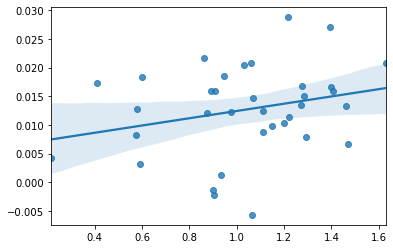

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

x = single_index_model['slope'].values
y = stocks_returns_mean.values
sns.regplot(x = x.astype(float), y = y.astype(float))
plt.show()

In [17]:
# Downloading the Fama-French 3-factor model for the risk free rate
fama_french_factors=wb.DataReader('F-F_Research_Data_Factors','famafrench',start_date,end_date)[0]
print(fama_french_factors.tail(5))
fama_french_factors.to_csv('fama_french_3_factor.csv')

         Mkt-RF   SMB   HML    RF
Date                             
2019-09    1.43 -0.97  6.83  0.18
2019-10    2.06  0.28 -1.93  0.15
2019-11    3.87  0.80 -2.02  0.12
2019-12    2.77  0.72  1.79  0.14
2020-01   -0.11 -3.13 -6.24  0.13


In [18]:
# Computing the avarage of the risk free rate over the same period
risk_free_rate_avg = fama_french_factors['RF'].mean()
print(f'The risk free rate is: {risk_free_rate_avg}')

The risk free rate is: 0.08278688524590165


In [21]:
# Comparing the risk premium and slope of the regression 
# on stock means and betas
average_market_return = model_data['SP500'].mean()
market_risk_premium = average_market_return - risk_free_rate_avg
slope = security_market_line.params[1]
print(f'Market risk premium: {market_risk_premium}\n',
      f'Security Market Line Slope: {slope}')

Market risk premium: -0.0739956865167042
 Security Market Line Slope: 0.006352128250855643


In [22]:
# Calculating t-statistics and R-squared
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df)) # retrieved from scipy documentation
r_squared = security_market_line.rsquared
t_critical = tinv(0.05, 33)
t_statistic = (slope - market_risk_premium)/security_market_line.bse['slope']
print(f'R Squared {r_squared}\n',
      f'Critical t value {t_critical}\n',
      f'Calculated t value: {t_statistic}\n')

R Squared 0.0684441667607204
 Critical t value 2.0345152974493383
 Calculated t value: 19.695887599627284



## Fama French three-factor model

In [23]:
print(stocks_returns.shape)
print( fama_french_factors.shape)
ff_factors = fama_french_factors.iloc[1:-1, :]
# print(ff_factors)
print(stocks_returns)

(59, 35)
(61, 4)
                   A       ADI      AMAT      ATVI        BA       BXP  \
Date                                                                     
2015-02-01  0.117554  0.123393  0.096760  0.115789  0.037697 -0.010014   
2015-03-01 -0.015636  0.076187 -0.099401 -0.025300 -0.005104  0.022342   
2015-04-01 -0.004332 -0.018413 -0.122784  0.003960 -0.044909 -0.058158   
2015-05-01 -0.004351  0.098965  0.017180  0.106924 -0.019673 -0.017232   
2015-06-01 -0.063365 -0.055474 -0.045206 -0.041568 -0.012810 -0.069138   
2015-07-01  0.061431 -0.091291 -0.096774  0.065262  0.039288  0.018506   
2015-08-01 -0.113309 -0.042345 -0.073157  0.110120 -0.093570 -0.080305   
2015-09-01 -0.054530  0.009846 -0.087011  0.078938  0.002066  0.044276   
2015-10-01  0.099913  0.065768  0.141593  0.125283  0.130737  0.062922   
2015-11-01  0.107521  0.025116  0.119261  0.083429 -0.017694 -0.006834   
2015-12-01 -0.000239 -0.102385 -0.005328  0.027881 -0.005913  0.020402   
2016-01-01 -0.099498 

In [51]:
stocks_returns.index = ff_factors.index
multi_factor_data = pd.merge(stocks_returns, ff_factors, on = 'Date')
multi_factor_data.to_csv('f-f-3-factor.csv')
print(multi_factor_data.head())

                A       ADI      AMAT      ATVI        BA       BXP       CAT  \
Date                                                                            
2015-02  0.117554  0.123393  0.096760  0.115789  0.037697 -0.010014  0.036639   
2015-03 -0.015636  0.076187 -0.099401 -0.025300 -0.005104  0.022342 -0.034620   
2015-04 -0.004332 -0.018413 -0.122784  0.003960 -0.044909 -0.058158  0.085593   
2015-05 -0.004351  0.098965  0.017180  0.106924 -0.019673 -0.017232 -0.017956   
2015-06 -0.063365 -0.055474 -0.045206 -0.041568 -0.012810 -0.069138 -0.005860   

             CHRW       CNC       CVS  ...       STE      SWKS       TFC  \
Date                                   ...                                 
2015-02  0.043246  0.126053  0.058170  ... -0.010733  0.056592  0.078209   
2015-03 -0.014536  0.150179 -0.006354  ...  0.089120  0.120114  0.024704   
2015-04 -0.120595 -0.123073 -0.037981  ... -0.053650 -0.061451 -0.017953   
2015-05 -0.041311  0.215357  0.031121  ...  0.004962

In [25]:
# Fama-French 3 factor model
x = multi_factor_data[['Mkt-RF', 'SMB', 'HML']]
x_sm = sm.add_constant(x)

reg_model = {}

for (colname, colvalue) in stocks_returns.iteritems():
    y = stocks_returns[colname].values - ff_factors['RF']
    reg_result = sm.OLS(y, x_sm).fit()
    reg_model[colname] = reg_result

In [26]:
reg_model['A'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RF   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     5.828
Date:                Tue, 04 Jan 2022   Prob (F-statistic):            0.00157
Time:                        11:58:23   Log-Likelihood:                 61.157
No. Observations:                  59   AIC:                            -114.3
Df Residuals:                      55   BIC:                            -106.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0808      0.012     -6.655      0.000      -0.105      -0.056
Mkt-RF         0.0137      0.003      4.022      0.000       0.007       0.020
SMB           -0.0004      0.005     -0.079      0.937      -0.011       0.010
HML           -0.0007      0.005     -0.156      0.877      -0.010       0.008
==============================================================================
Omnibus:                        1.642   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.586
Skew:                          -0.378   Prob(JB):                        0.453
Kurtosis:                       2.730   Cond. No.                         3.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
ff3_betas = pd.DataFrame(index = reg_model.keys(), columns = ['const', 'Mkt-RF', 'SMB', 'HML'])
for k in reg_model.keys():
    ff3_betas.loc[k] = reg_model[k].params
ff3_betas

,const,Mkt-RF,SMB,HML
A,-0.080758,0.013668,-0.000403,-0.000705
ADI,-0.076343,0.012787,0.008089,0.005208
AMAT,-0.074805,0.015244,0.0059,0.005282
ATVI,-0.072367,0.008651,-0.003634,-0.006283
BA,-0.077624,0.012713,-0.000367,0.004148
BXP,-0.088217,0.008142,0.006199,0.003082
CAT,-0.080064,0.013557,0.006664,0.007161
CHRW,-0.083811,0.005533,0.003482,0.004456
CNC,-0.071701,0.007186,0.013831,-0.006383
CVS,-0.093843,0.008729,-0.000516,0.000517


In [28]:
# Regression of stocks mean(y) on the fama-french betas(x)
x = ff3_betas[['Mkt-RF', 'SMB','HML']]
x_sm = sm.add_constant(x)
y = stocks_returns_mean.values
ff3_model = sm.OLS(y.astype(float), x_sm.astype(float)).fit()
print(ff3_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     8.454
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           0.000299
Time:                        11:58:26   Log-Likelihood:                 131.21
No. Observations:                  35   AIC:                            -254.4
Df Residuals:                      31   BIC:                            -248.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.003      1.073      0.2

## Fama French-Carhart (4-factor model)

In [30]:
# Downloading the momentum factor data
momentum_data = wb.DataReader('F-F_MOmentum_Factor', 'famafrench', start_date, end_date)[0]
print(momentum_data.head())
momentum_data.to_csv('momentum_factor.csv')
mom_factor = momentum_data.iloc[1:-1, :]
mom_factor.columns = ['Mom']
carhart_4_factor = pd.merge(multi_factor_data, mom_factor, on = 'Date')
print(carhart_4_factor.head())
carhart_4_factor.to_csv('carhart_4_factor.csv')

         Mom   
Date           
2015-01    3.85
2015-02   -2.80
2015-03    2.74
2015-04   -7.27
2015-05    5.83
                A       ADI      AMAT      ATVI        BA       BXP       CAT  \
Date                                                                            
2015-02  0.117554  0.123393  0.096760  0.115789  0.037697 -0.010014  0.036639   
2015-03 -0.015636  0.076187 -0.099401 -0.025300 -0.005104  0.022342 -0.034620   
2015-04 -0.004332 -0.018413 -0.122784  0.003960 -0.044909 -0.058158  0.085593   
2015-05 -0.004351  0.098965  0.017180  0.106924 -0.019673 -0.017232 -0.017956   
2015-06 -0.063365 -0.055474 -0.045206 -0.041568 -0.012810 -0.069138 -0.005860   

             CHRW       CNC       CVS  ...      SWKS       TFC       TSN  \
Date                                   ...                                 
2015-02  0.043246  0.126053  0.058170  ...  0.056592  0.078209  0.058146   
2015-03 -0.014536  0.150179 -0.006354  ...  0.120114  0.024704 -0.072864   
2015-04 -0.12059

In [31]:
# Fama-French-Carhahart 4 factor model
x = carhart_4_factor[['Mkt-RF', 'SMB', 'HML','Mom']]
x_sm = sm.add_constant(x)

carhart_model = {}
for (colname, colvalue) in stocks_returns.iteritems():
    y = stocks_returns[colname].values - carhart_4_factor['RF']
    result = sm.OLS(y, x_sm).fit()
    carhart_model[colname] = result

In [32]:
carhart_model['A'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RF   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     4.294
Date:                Tue, 04 Jan 2022   Prob (F-statistic):            0.00434
Time:                        11:59:04   Log-Likelihood:                 61.162
No. Observations:                  59   AIC:                            -112.3
Df Residuals:                      54   BIC:                            -101.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0807      0.012     -6.559      0.000      -0.105      -0.056
Mkt-RF         0.0135      0.004      3.572      0.001       0.006       0.021
SMB           -0.0004      0.005     -0.086      0.932      -0.011       0.010
HML           -0.0010      0.006     -0.178      0.860      -0.012       0.010
Mom           -0.0004      0.004     -0.090      0.929      -0.009       0.008
==============================================================================
Omnibus:                        1.596   Durbin-Watson:                   0.544
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                1.551
Skew:                          -0.372   Prob(JB):                        0.460
Kurtosis:                       2.721   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
ff4_betas = pd.DataFrame(index = carhart_model.keys(), columns = ['Mkt-RF', 'SMB', 'HML','Mom'])

for k in carhart_model.keys():
    ff4_betas.loc[k] = carhart_model[k].params
    
ff4_betas

,Mkt-RF,SMB,HML,Mom
A,0.013524,-0.000441,-0.000996,-0.000375
ADI,0.013443,0.008264,0.006539,0.001709
AMAT,0.015368,0.005933,0.005535,0.000325
ATVI,0.010036,-0.003265,-0.003473,0.003607
BA,0.014477,0.000102,0.007726,0.004592
BXP,0.008589,0.006318,0.003989,0.001164
CAT,0.012805,0.006463,0.005635,-0.001958
CHRW,0.008593,0.004296,0.010665,0.00797
CNC,0.009256,0.014382,-0.002182,0.005392
CVS,0.010618,-0.000013,0.004352,0.004922


In [34]:
# Regression of stocks mean(y) on the fama-french betas(x)
x = ff4_betas[['Mkt-RF', 'SMB','HML', 'Mom']]
x_sm = sm.add_constant(x)
y = stocks_returns_mean.values
ff4_model = sm.OLS(y.astype(float), x_sm.astype(float)).fit()
print(ff4_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     6.491
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           0.000690
Time:                        11:59:11   Log-Likelihood:                 131.66
No. Observations:                  35   AIC:                            -253.3
Df Residuals:                      30   BIC:                            -245.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.004      0.452      0.6

## Calculating Value at Risk (VaR) and Conditional-VaR (C-VaR)

In [35]:
# define equal weights - we 35 stocks
weight = 1/35
weights = weight*np.ones(35)
# Calculate the portfolio weighted expected return
exp_portfolio_return = stocks_returns_mean.dot(weights)
print(exp_portfolio_return)
# Portfolio standard deviation
covariance_matrix = stocks_returns.cov()
portfolio_sd = np.sqrt(weights.T.dot(covariance_matrix).dot(weights))
print(portfolio_sd)

0.012674581635195923
0.03801810099183207


In [36]:
# Consider an investment of US$10,000 in the next 1 month
investment = 10000
# average of the investment return
average_investment_return = (1 + exp_portfolio_return) * investment
# Standard deviation of the investment return
sd_investment = investment * (portfolio_sd)

In [42]:
# Let's a function to calculate VaR
from scipy.stats import norm
    
def value_at_risk(conf_level, mean_investment, sd_investment, init_investment = 10000):
    """
        conf_level - > Confidence level
        mean_investment ->
        sd _investment ->
    """
    threshold = norm.ppf(conf_level, mean_investment, sd_investment)
    value_at_risk = init_investment - threshold
    return value_at_risk

In [43]:
# function to calculate the C-VaR
def conditional_var(conf_level, value_at_risk):
    conditional_VaR = (1/(1 - conf_level))*value_at_risk
    return conditional_VaR

In [49]:
var_95 = value_at_risk(0.05, average_investment_return, sd_investment)
var_99 = value_at_risk(0.01, average_investment_return, sd_investment)
print(f'VaR at 95% Confience level is {var_95}\n',
      f'and at 99% Confidence level is {var_99}')

VaR at 95% Confience level is 498.59629671026414
 and at 99% Confidence level is 757.6874678222266


In [50]:
Cvar_95 = conditional_var(0.05, var_95)
Cvar_99 = conditional_var(0.01, var_99)
print(f'CVaR at 95% Confience level is {Cvar_95}\n',
      f'and at 99% Confidence level is {Cvar_99}')

CVaR at 95% Confience level is 524.8382070634359
 and at 99% Confidence level is 765.3408765881078
